# PREREQUISITES

In [1]:
# IMPORTS

import json
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
import pickle
from pandas import DataFrame
from collections import Counter
from matplotlib import pyplot
from numpy import where
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
!pip install tensorflow
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model
from tensorflow.keras.layers import LSTM
import tensorflow.keras
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# DATA LOADING

p1_data = pd.read_pickle(r'og_data/partition1_data.pkl')
p2_data = pd.read_pickle(r'og_data/partition2_data.pkl')
p3_data = pd.read_pickle(r'og_data/partition3_data.pkl')
p4_data = pd.read_pickle(r'og_data/partition4_data.pkl')
p5_data = pd.read_pickle(r'og_data/partition5_data.pkl')
p1_labels = pd.read_pickle(r'og_data/partition1_labels.pkl')
p2_labels = pd.read_pickle(r'og_data/partition2_labels.pkl')
p3_labels = pd.read_pickle(r'og_data/partition3_labels.pkl')
p4_labels = pd.read_pickle(r'og_data/partition4_labels.pkl')
p5_labels = pd.read_pickle(r'og_data/partition5_labels.pkl')

# CONVERTING DATA TO BINARY NUMERICALS

p1_labels_binary = np.where(p1_labels == 'B', 0, p1_labels)
p1_labels_binary = np.where(p1_labels_binary == 'C', 0, p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'F', 0, p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'M', 1, p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'X', 1, p1_labels_binary)

p2_labels_binary = np.where(p2_labels == 'B', 0, p2_labels)
p2_labels_binary = np.where(p2_labels_binary == 'C', 0, p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'F', 0, p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'M', 1, p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'X', 1, p2_labels_binary)

p3_labels_binary = np.where(p3_labels == 'B', 0, p3_labels)
p3_labels_binary = np.where(p3_labels_binary == 'C', 0, p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'F', 0, p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'M', 1, p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'X', 1, p3_labels_binary)

p4_labels_binary = np.where(p4_labels == 'B', 0, p4_labels)
p4_labels_binary = np.where(p4_labels_binary == 'C', 0, p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'F', 0, p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'M', 1, p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'X', 1, p4_labels_binary)

p5_labels_binary = np.where(p5_labels == 'B', 0, p5_labels)
p5_labels_binary = np.where(p5_labels_binary == 'C', 0, p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'F', 0, p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'M', 1, p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'X', 1, p5_labels_binary)

# EXPERIMENTS

# Pair 1

In [7]:
X_train, y_train, X_test, y_test = p1_data, p1_labels_binary, p2_data, p2_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 17:42:22.685928: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 17:42:24.311890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 17:42:24.312605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 17:42:24.313079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2163 [..............................] - ETA: 1:07 - loss: 0.0248

2023-01-05 17:42:26.827453: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2163/2163 [==============================] - 79s 36ms/step - loss: 0.0168
Epoch 2/5
2163/2163 [==============================] - 78s 36ms/step - loss: 0.0163
Epoch 3/5
2163/2163 [==============================] - 78s 36ms/step - loss: 0.0155
Epoch 4/5
2163/2163 [==============================] - 80s 37ms/step - loss: 0.0155
Epoch 5/5
2163/2163 [==============================] - 80s 37ms/step - loss: 0.0153
[[78232    24]
 [ 1247    38]]


In [8]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.02926529868646215
0.05501630843215342


# Pair 2

In [7]:
X_train, y_train, X_test, y_test = p1_data, p1_labels_binary, p3_data, p3_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 20:11:17.632134: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:11:19.265441: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 20:11:19.266061: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 20:11:19.266507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2163 [..............................] - ETA: 1:02 - loss: 0.0493

2023-01-05 20:11:21.886693: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2163/2163 [==============================] - 82s 37ms/step - loss: 0.0168
Epoch 2/5
2163/2163 [==============================] - 79s 37ms/step - loss: 0.0159
Epoch 3/5
2163/2163 [==============================] - 79s 37ms/step - loss: 0.0155
Epoch 4/5
2163/2163 [==============================] - 79s 36ms/step - loss: 0.0154
Epoch 5/5
2163/2163 [==============================] - 79s 37ms/step - loss: 0.0153
[[36527     8]
 [ 1247    30]]


In [8]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.023273592576346536
0.04376092981447043


# Pair 3

In [2]:
X_train, y_train, X_test, y_test = p1_data, p1_labels_binary, p4_data, p4_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 20:22:41.967515: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:22:43.581310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 20:22:43.581904: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 20:22:43.582363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2163 [..............................] - ETA: 1:07 - loss: 0.0371

2023-01-05 20:22:46.015661: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2163/2163 [==============================] - 79s 36ms/step - loss: 0.0168
Epoch 2/5
2163/2163 [==============================] - 79s 36ms/step - loss: 0.0165
Epoch 3/5
2163/2163 [==============================] - 81s 37ms/step - loss: 0.0156
Epoch 4/5
2163/2163 [==============================] - 78s 36ms/step - loss: 0.0153
Epoch 5/5
2163/2163 [==============================] - 79s 36ms/step - loss: 0.0154
[[42663    32]
 [  790   100]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.11161004827815799
0.19142966956307433


# Pair 4

In [2]:
X_train, y_train, X_test, y_test = p1_data, p1_labels_binary, p5_data, p5_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 20:33:44.404172: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:33:46.022429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 20:33:46.023023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 20:33:46.023511: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2163 [..............................] - ETA: 1:08 - loss: 0.0248

2023-01-05 20:33:48.694002: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2163/2163 [==============================] - 80s 36ms/step - loss: 0.0168
Epoch 2/5
2163/2163 [==============================] - 81s 37ms/step - loss: 0.0166
Epoch 3/5
2163/2163 [==============================] - 80s 37ms/step - loss: 0.0155
Epoch 4/5
2163/2163 [==============================] - 80s 37ms/step - loss: 0.0152
Epoch 5/5
2163/2163 [==============================] - 79s 37ms/step - loss: 0.0151
[[65501   108]
 [  894     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

-0.0016461156243808015
-0.002906314958970335


/tmp/ipykernel_69716/3715952775.py:12: RuntimeWarning: invalid value encountered in double_scalars
  f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)


# Pair 5

In [2]:
X_train, y_train, X_test, y_test = p2_data, p2_labels_binary, p1_data, p1_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 20:44:33.574778: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:44:35.189099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 20:44:35.189706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 20:44:35.190162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2486 [..............................] - ETA: 1:24 - loss: 0.0187      

2023-01-05 20:44:37.858387: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2486/2486 [==============================] - 92s 36ms/step - loss: 0.0159
Epoch 2/5
2486/2486 [==============================] - 94s 38ms/step - loss: 0.0150
Epoch 3/5
2486/2486 [==============================] - 95s 38ms/step - loss: 0.0145
Epoch 4/5
2486/2486 [==============================] - 94s 38ms/step - loss: 0.0144
Epoch 5/5
2486/2486 [==============================] - 97s 39ms/step - loss: 0.0143
[[68009     0]
 [ 1180     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_70348/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 6

In [2]:
X_train, y_train, X_test, y_test = p2_data, p2_labels_binary, p3_data, p3_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 20:53:15.994129: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:53:17.612383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 20:53:17.612979: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 20:53:17.613441: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2486 [..............................] - ETA: 1:24 - loss: 0.0187      

2023-01-05 20:53:20.352199: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2486/2486 [==============================] - 91s 36ms/step - loss: 0.0159
Epoch 2/5
2486/2486 [==============================] - 90s 36ms/step - loss: 0.0158
Epoch 3/5
2486/2486 [==============================] - 90s 36ms/step - loss: 0.0148
Epoch 4/5
2486/2486 [==============================] - 93s 37ms/step - loss: 0.0145
Epoch 5/5
2486/2486 [==============================] - 92s 37ms/step - loss: 0.0144
[[36535     0]
 [ 1277     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_70981/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 7

In [2]:
X_train, y_train, X_test, y_test = p2_data, p2_labels_binary, p4_data, p4_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 21:02:45.773306: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 21:02:47.384581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 21:02:47.385223: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 21:02:47.385692: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2486 [..............................] - ETA: 1:11 - loss: 0.0062      

2023-01-05 21:02:50.058288: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-05 21:02:50.058329: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2486/2486 [==============================] - 93s 37ms/step - loss: 0.0159
Epoch 2/5
2486/2486 [==============================] - 93s 37ms/step - loss: 0.0159
Epoch 3/5
2486/2486 [==============================] - 94s 38ms/step - loss: 0.0173
Epoch 4/5
2486/2486 [==============================] - 97s 39ms/step - loss: 0.0154
Epoch 5/5
2486/2486 [==============================] - 95s 38ms/step - loss: 0.0150
[[42695     0]
 [  884     6]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.006741573033707865
0.01312296562527855


# Pair 8

In [2]:
X_train, y_train, X_test, y_test = p2_data, p2_labels_binary, p5_data, p5_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 21:11:22.642342: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 21:11:24.266275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 21:11:24.266868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 21:11:24.267335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2486 [..............................] - ETA: 1:20 - loss: 0.0367      

2023-01-05 21:11:26.946565: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2486/2486 [==============================] - 93s 37ms/step - loss: 0.0159
Epoch 2/5
2486/2486 [==============================] - 92s 37ms/step - loss: 0.0155
Epoch 3/5
2486/2486 [==============================] - 93s 37ms/step - loss: 0.0145
Epoch 4/5
2486/2486 [==============================] - 91s 37ms/step - loss: 0.0144
Epoch 5/5
2486/2486 [==============================] - 92s 37ms/step - loss: 0.0143
[[65566    43]
 [  894     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

-0.0006553978874849488
-0.0012353536940673023


/tmp/ipykernel_72245/3715952775.py:12: RuntimeWarning: invalid value encountered in double_scalars
  f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)


# Pair 9

In [2]:
X_train, y_train, X_test, y_test = p3_data, p3_labels_binary, p1_data, p1_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-05 21:24:44.702585: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 21:24:46.336386: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-05 21:24:46.337008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-05 21:24:46.337467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1182 [..............................] - ETA: 46s - loss: 0.0308

2023-01-05 21:24:48.561595: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1182/1182 [==============================] - 46s 37ms/step - loss: 0.0327
Epoch 2/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0319
Epoch 3/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0296
Epoch 4/5
1182/1182 [==============================] - 44s 38ms/step - loss: 0.0293
Epoch 5/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0293
[[68009     0]
 [ 1180     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_72881/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 10

In [2]:
X_train, y_train, X_test, y_test = p3_data, p3_labels_binary, p2_data, p2_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 13:47:13.911818: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 13:47:15.512403: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 13:47:15.513046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 13:47:15.513544: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1182 [..............................] - ETA: 37s - loss: 0.0185    

2023-01-07 13:47:17.732316: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1182/1182 [==============================] - 43s 35ms/step - loss: 0.0327
Epoch 2/5
1182/1182 [==============================] - 42s 35ms/step - loss: 0.0318
Epoch 3/5
1182/1182 [==============================] - 43s 36ms/step - loss: 0.0296
Epoch 4/5
1182/1182 [==============================] - 43s 37ms/step - loss: 0.0293
Epoch 5/5
1182/1182 [==============================] - 43s 36ms/step - loss: 0.0293
[[78256     0]
 [ 1285     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_82355/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 11

In [2]:
X_train, y_train, X_test, y_test = p3_data, p3_labels_binary, p4_data, p4_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 13:52:29.623926: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 13:52:31.239808: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 13:52:31.240451: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 13:52:31.240923: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1182 [..............................] - ETA: 44s - loss: 0.0434    

2023-01-07 13:52:33.395096: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1182/1182 [==============================] - 44s 36ms/step - loss: 0.0327
Epoch 2/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0325
Epoch 3/5
1182/1182 [==============================] - 46s 39ms/step - loss: 0.0297
Epoch 4/5
1182/1182 [==============================] - 45s 38ms/step - loss: 0.0292
Epoch 5/5
1182/1182 [==============================] - 43s 36ms/step - loss: 0.0291
[[42695     0]
 [  849    41]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.046067415730337076
0.08643426292607603


# Pair 12

In [2]:
X_train, y_train, X_test, y_test = p3_data, p3_labels_binary, p5_data, p5_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 13:57:03.707112: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 13:57:05.337701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 13:57:05.338353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 13:57:05.338805: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1182 [..............................] - ETA: 36s - loss: 0.0309    

2023-01-07 13:57:07.617315: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1182/1182 [==============================] - 44s 36ms/step - loss: 0.0327
Epoch 2/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0326
Epoch 3/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0325
Epoch 4/5
1182/1182 [==============================] - 43s 37ms/step - loss: 0.0311
Epoch 5/5
1182/1182 [==============================] - 43s 37ms/step - loss: 0.0294
[[65609     0]
 [  894     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_83621/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 13

In [2]:
X_train, y_train, X_test, y_test = p4_data, p4_labels_binary, p1_data, p1_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:01:20.976159: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:01:22.593203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:01:22.593810: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:01:22.594247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1363 [..............................] - ETA: 43s - loss: 0.0249

2023-01-07 14:01:24.850266: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1363/1363 [==============================] - 50s 36ms/step - loss: 0.0200
Epoch 2/5
1363/1363 [==============================] - 49s 36ms/step - loss: 0.1907
Epoch 3/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0200
Epoch 4/5
1363/1363 [==============================] - 49s 36ms/step - loss: 0.0200
Epoch 5/5
1363/1363 [==============================] - 51s 38ms/step - loss: 0.0200
[[68009     0]
 [ 1180     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_84253/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 14

In [2]:
X_train, y_train, X_test, y_test = p4_data, p4_labels_binary, p2_data, p2_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:07:58.333471: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:07:59.939550: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:07:59.940170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:07:59.940613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1363 [..............................] - ETA: 43s - loss: 0.0125    

2023-01-07 14:08:02.295827: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1363/1363 [==============================] - 50s 36ms/step - loss: 0.0200
Epoch 2/5
1363/1363 [==============================] - 50s 36ms/step - loss: 0.0200
Epoch 3/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0197
Epoch 4/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0165
Epoch 5/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0174
[[78231    25]
 [ 1254    31]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.02380504929645255
0.04494551995459355


# Pair 15

In [2]:
X_train, y_train, X_test, y_test = p4_data, p4_labels_binary, p3_data, p3_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:14:21.007548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:14:22.633325: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:14:22.633980: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:14:22.634464: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1363 [..............................] - ETA: 40s - loss: 0.0310    

2023-01-07 14:14:24.966028: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1363/1363 [==============================] - 50s 36ms/step - loss: 0.0200
Epoch 2/5
1363/1363 [==============================] - 50s 36ms/step - loss: 0.0601
Epoch 3/5
1363/1363 [==============================] - 49s 36ms/step - loss: 0.0167
Epoch 4/5
1363/1363 [==============================] - 50s 36ms/step - loss: 0.0161
Epoch 5/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0160
[[36514    21]
 [ 1245    32]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.02448394010570527
0.04555127727272383


# Pair 16

In [2]:
X_train, y_train, X_test, y_test = p4_data, p4_labels_binary, p5_data, p5_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:19:17.195685: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:19:18.805695: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:19:18.806278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:19:18.806703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/1363 [..............................] - ETA: 39s - loss: 0.0188    

2023-01-07 14:19:21.079458: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1363/1363 [==============================] - 50s 36ms/step - loss: 0.0200
Epoch 2/5
1363/1363 [==============================] - 50s 37ms/step - loss: 0.0200
Epoch 3/5
1363/1363 [==============================] - 49s 36ms/step - loss: 0.0202
Epoch 4/5
1363/1363 [==============================] - 51s 37ms/step - loss: 0.0206
Epoch 5/5
1363/1363 [==============================] - 53s 39ms/step - loss: 0.0182
[[65609     0]
 [  894     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_86153/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 17

In [2]:
X_train, y_train, X_test, y_test = p5_data, p5_labels_binary, p1_data, p1_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:24:39.820019: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:24:41.452449: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:24:41.453055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:24:41.453547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2079 [..............................] - ETA: 1:02 - loss: 0.0062    

2023-01-07 14:24:43.979264: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2079/2079 [==============================] - 77s 36ms/step - loss: 0.0133
Epoch 2/5
2079/2079 [==============================] - 77s 37ms/step - loss: 0.0132
Epoch 3/5
2079/2079 [==============================] - 76s 37ms/step - loss: 0.0123
Epoch 4/5
2079/2079 [==============================] - 77s 37ms/step - loss: 0.0121
Epoch 5/5
2079/2079 [==============================] - 77s 37ms/step - loss: 0.0119
[[68009     0]
 [ 1180     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_86786/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 18

In [2]:
X_train, y_train, X_test, y_test = p5_data, p5_labels_binary, p2_data, p2_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-07 14:32:05.766270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 14:32:07.386157: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-07 14:32:07.386802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-07 14:32:07.387231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2079 [..............................] - ETA: 1:10 - loss: 0.0429

2023-01-07 14:32:09.869904: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2079/2079 [==============================] - 77s 36ms/step - loss: 0.0133
Epoch 2/5
2079/2079 [==============================] - 76s 37ms/step - loss: 0.0123
Epoch 3/5
2079/2079 [==============================] - 76s 37ms/step - loss: 0.0119
Epoch 4/5
2079/2079 [==============================] - 76s 36ms/step - loss: 0.0119
Epoch 5/5
2079/2079 [==============================] - 76s 37ms/step - loss: 0.0118
[[78230    26]
 [ 1282     3]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0020023874550810787
0.003855869033349156


# Pair 19

In [2]:
X_train, y_train, X_test, y_test = p5_data, p5_labels_binary, p3_data, p3_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-09 12:56:22.628413: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 12:56:24.264628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-09 12:56:24.265263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-09 12:56:24.265723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2079 [..............................] - ETA: 1:03 - loss: 6.1252e-07

2023-01-09 12:56:26.793240: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2079/2079 [==============================] - 77s 37ms/step - loss: 0.0133
Epoch 2/5
2079/2079 [==============================] - 75s 36ms/step - loss: 0.0132
Epoch 3/5
2079/2079 [==============================] - 78s 37ms/step - loss: 0.0125
Epoch 4/5
2079/2079 [==============================] - 73s 35ms/step - loss: 0.0120
Epoch 5/5
2079/2079 [==============================] - 77s 37ms/step - loss: 0.0119
[[36535     0]
 [ 1277     0]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.0
0.0


/tmp/ipykernel_102226/3715952775.py:8: RuntimeWarning: invalid value encountered in true_divide
  pr_pos = TP/(TP + FP)


# Pair 20

In [2]:
X_train, y_train, X_test, y_test = p5_data, p5_labels_binary, p4_data, p4_labels_binary
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train = X_train / np.linalg.norm(X_train)
X_test = X_test / np.linalg.norm(X_test)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(24,60)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=5)

pred = model.predict(X_test)

pp = []
for j in pred:
    if (j < 0.5):
        pp.append(0)
    else:
        pp.append(1)

score = confusion_matrix(y_test,pp)

print(score)

2023-01-09 13:06:45.217040: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 13:06:46.893321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14243 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-01-09 13:06:46.893989: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14243 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-01-09 13:06:46.894472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 64,501
Trainable params: 64,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   5/2079 [..............................] - ETA: 1:15 - loss: 0.0186

2023-01-09 13:06:49.572628: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2079/2079 [==============================] - 79s 37ms/step - loss: 0.0133
Epoch 2/5
2079/2079 [==============================] - 75s 36ms/step - loss: 0.0123
Epoch 3/5
2079/2079 [==============================] - 76s 37ms/step - loss: 0.0118
Epoch 4/5
2079/2079 [==============================] - 75s 36ms/step - loss: 0.0118
Epoch 5/5
2079/2079 [==============================] - 70s 34ms/step - loss: 0.0117
[[42609    86]
 [  859    31]]


In [3]:
TN, FP, FN, TP = score.ravel()
TN = np.array(TN)
FP = np.array(FP)
FN = np.array(FN)
TP = np.array(TP)

acc = (TP + TN) / (TP + FN + TN + FP)
pr_pos = TP/(TP + FP)
pr_neg = TN/(TN + FN)
rc_pos = TP/(TP + FN)
rc_neg = TN/(TN + FP)
f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)

P = TP + FN
N = TN + FP

HSS1 = (TP + TN - N) / P
HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)

CH = ((TP+FP)*(TP+FN))/(P+N)
GS = (TP-CH)/(TP+FP+FN-CH)

TSS = ((TP*TN)-(FP*FN))/(P*N)

print(TSS)
print(HSS2)

0.03281717328687542
0.05709489997386786


# VISUALIZING

In [4]:
tss = [0.02926529868646215, 0.023273592576346536, 0.11161004827815799, -0.0016461156243808015, 0, 0,
       0.006741573033707865, -0.0006553978874849488, 0, 0, 0.046067415730337076, 0, 0, 0.02380504929645255,
       0.02448394010570527, 0, 0, 0.0020023874550810787, 0, 0.03281717328687542]

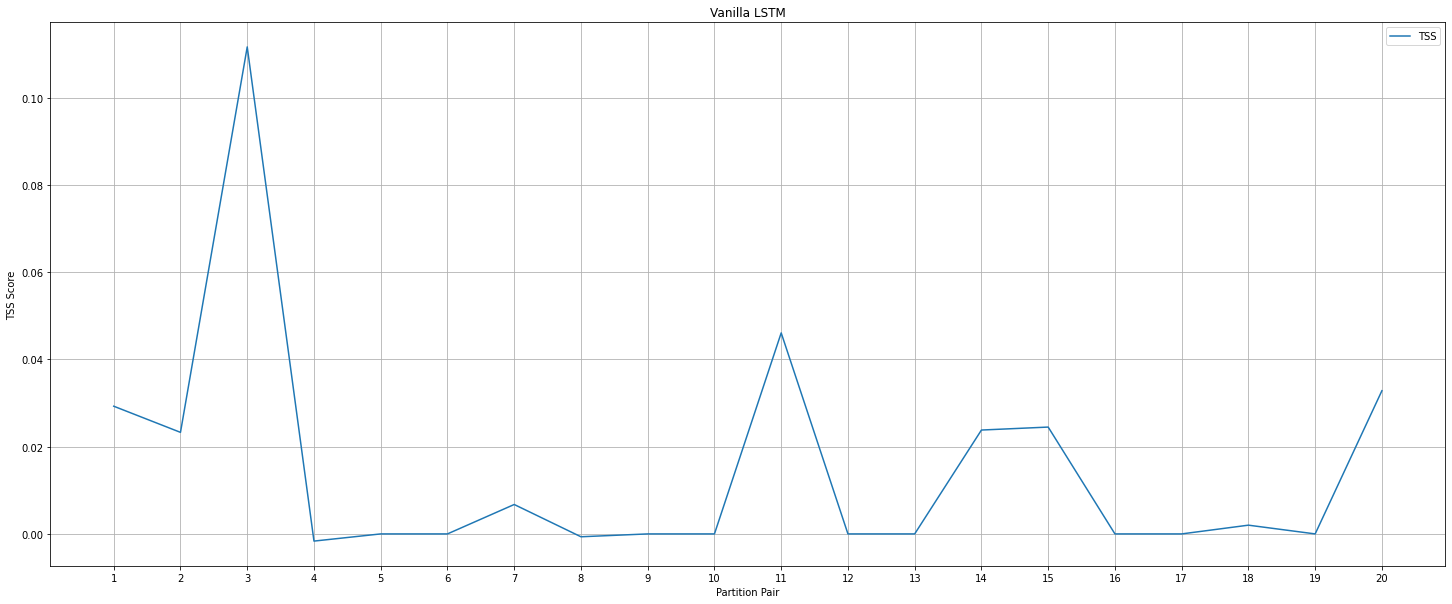

In [6]:
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss, label='TSS')
plt.xlabel("Partition Pair")
plt.ylabel("TSS Score")
plt.title("Vanilla LSTM")
plt.legend()
plt.xticks(pair)
plt.grid(True)